In [0]:

from tensorflow.python.client import device_lib

print("Show System RAM Memory:\n\n")
!cat /proc/meminfo | egrep "MemTotal*"


print("\n\nShow Devices:\n\n"+str(device_lib.list_local_devices()))

Show System RAM Memory:


MemTotal:       13335276 kB


Show Devices:

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12196280478766970558
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 1001360873048876288
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 14836815803149917269
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14800692839
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6919416127242577209
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In [0]:
#Download neural_style.py
#This code originates from https://github.com/cysmith/neural-style-tf
!wget --output-document=neural_style.py 'https://storage.googleapis.com/marketing-files/colab-notebooks/style-transfer/neural_style.py'
 
!cat ./wget-log  
  
#Download ImageNet VGG Very Deep
#VGG-VD models from the Very Deep Convolutional Networks for Large-Scale Visual Recognition project.
!wget --output-document=imagenet-vgg-verydeep-19.mat 'https://storage.googleapis.com/marketing-files/colab-notebooks/style-transfer/imagenet-vgg-verydeep-19.mat'
 
!cat ./wget-log.1

--2019-05-04 10:14:40--  https://storage.googleapis.com/marketing-files/colab-notebooks/style-transfer/neural_style.py
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.124.128, 2607:f8b0:4001:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.124.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30650 (30K) [text/x-python-script]
Saving to: ‘neural_style.py’

neural_style.py     100%[===================>]  29.93K  --.-KB/s    in 0s      

2019-05-04 10:14:40 (114 MB/s) - ‘neural_style.py’ saved [30650/30650]

cat: ./wget-log: No such file or directory
--2019-05-04 10:14:48--  https://storage.googleapis.com/marketing-files/colab-notebooks/style-transfer/imagenet-vgg-verydeep-19.mat
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.126.128, 2607:f8b0:4001:c1b::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.126.128|:443... connected.
HTTP request sent, awaiting response... 2

In [0]:
import re
from IPython.display import Image
import urllib

def download_image_from_URL(imageURL):
  imageName = re.search('[a-z0-9\-]+\.(jpe?g|png|gif|bmp)', imageURL, re.IGNORECASE)
  imageName = imageName.group(0)
  urllib.request.urlretrieve(imageURL, imageName)
  imagePath = "./" + imageName
  return imagePath
   
#Download Image from URL and Store Path in Variable

#Content image model.jpg
imageDownload1 = download_image_from_URL("https://i.imgur.com/m5kXkDM.jpg")

#Style image oil.jpg
imageDownload2 = download_image_from_URL("https://static.standard.co.uk/s3fs-public/thumbnails/image/2019/03/05/11/sei26139543-1-0.jpg")

#Style image polygon-2.jpg
imageDownload3 = download_image_from_URL("https://storage.googleapis.com/marketing-files/colab-notebooks/style-transfer/polygon-2.png")

#Display Local Image
# Image(imageDownload1)


---- RENDERING SINGLE IMAGE ----

2019-05-04 10:15:12.722421: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-05-04 10:15:12.722669: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x32911e0 executing computations on platform Host. Devices:
2019-05-04 10:15:12.722700: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
2019-05-04 10:15:12.829644: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-05-04 10:15:12.830124: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x3290dc0 executing computations on platform CUDA. Devices:
2019-05-04 10:15:12.830151: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2019-05-04 10:15:12.830598: I tensorflow/core/common_runti

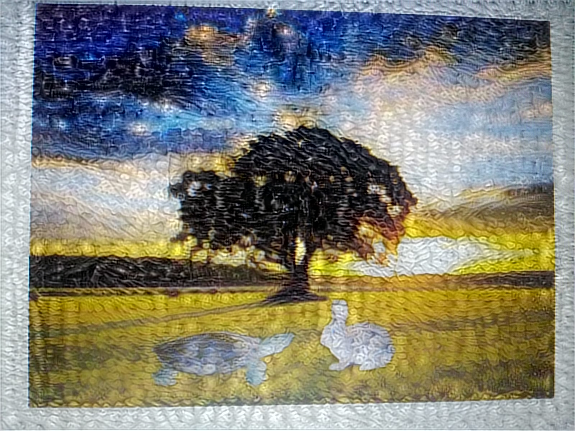

In [0]:
from IPython.display import Image


! python neural_style.py --content_img_dir ./ \
                       --content_img m5kXkDM.jpg \
                       --style_imgs_dir ./ \
                       --style_imgs sei26139543-1-0.jpg \
                       --style_imgs_weights 1  \
                       --max_iterations 55 \
                       --original_colors \
                       --max_size 575 \
                       --img_name output \
                       --content_weight 1 \
                       --device /cpu:0 \
                       --img_output_dir ./ \
                       --verbose;
                    
# Print Final Image
# --max_size: Maximum width or height of the input images. Default: 512
# --content_weight: Weight for the content loss function. Default: 5e0
# --style_weight: Weight for the style loss function. Default: 1e4
# --tv_weight: Weight for the total variational loss function. Default: 1e-3
# --temporal_weight: Weight for the temporal loss function. Default: 2e2
# --content_layers: Space-separated VGG-19 layer names used for the content image. Default: conv4_2
# --style_layers: Space-separated VGG-19 layer names used for the style image. Default: relu1_1 relu2_1 relu3_1 relu4_1 
# relu5_1
# --content_layer_weights: Space-separated weights of each content layer to the content loss. Default: 1.0
# --style_layer_weights: Space-separated weights of each style layer to loss. Default: 0.2 0.2 0.2 0.2 0.2
# --original_colors: Boolean flag indicating if the style is transferred but not the colors.

Image('./output/output.png')